In [1]:
# 尝试分词
from tensorflow.keras.preprocessing.text import Tokenizer
    
words = ['Lao Wang has a Wechat account.', 'He is not a nice person.', 'Be careful.']
tokenizer = Tokenizer(num_words = 30)
tokenizer.fit_on_texts(words)
sequences = tokenizer.texts_to_sequences(words)

one_hot_matrix = tokenizer.texts_to_matrix(words, mode='binary')
word_index = tokenizer.word_index
print('找到了 %s个词' % len(word_index))
print('这3句话(单词)的序号编码：' , sequences)
print('这3句话（单词）的One-hot编码：' , one_hot_matrix)

2024-03-21 12:00:49.500097: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-21 12:00:49.500242: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-21 12:00:49.682520: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


找到了 13个词
这3句话(单词)的序号编码： [[2, 3, 4, 1, 5, 6], [7, 8, 9, 1, 10, 11], [12, 13]]
这3句话（单词）的One-hot编码： [[0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]]


In [2]:
import pandas as pd
import numpy as np

df_comments = pd.read_csv("/kaggle/input/product-comments/Clothing Reviews.csv")
df_comments.head()
# df_comments["Review Text"]

,id,Review Text,Rating
0,0,Absolutely wonderful - silky and comfortable,4
1,1,Love this dress! it's sooo pretty. i happene...,5
2,2,I had such high hopes for this dress and reall...,3
3,3,"I love, love, love this jumpsuit. it's fun, fl...",5
4,4,This shirt is very flattering to all due to th...,5


In [3]:
from tensorflow.keras.preprocessing.text import Tokenizer
    
train_words = df_comments["Review Text"]
dictionary_size = 20000
tokenizer = Tokenizer(num_words = dictionary_size)
tokenizer.fit_on_texts(train_words)
X_train_tokened = tokenizer.texts_to_sequences(train_words)
y_train = df_comments["Rating"]
X_train_tokened[0], y_train[0]

# one_hot_matrix = tokenizer.texts_to_matrix(train_words, mode='binary')
# word_index = tokenizer.word_index
# print('找到了 %s个词' % len(word_index))
# print('这3句话(单词)的序号编码：' , sequences)
# print('这3句话（单词）的One-hot编码：' , one_hot_matrix)

([253, 532, 917, 3, 68], 4)

In [4]:
len(X_train_tokened), len(train_words)
y_train.shape

(22641,)

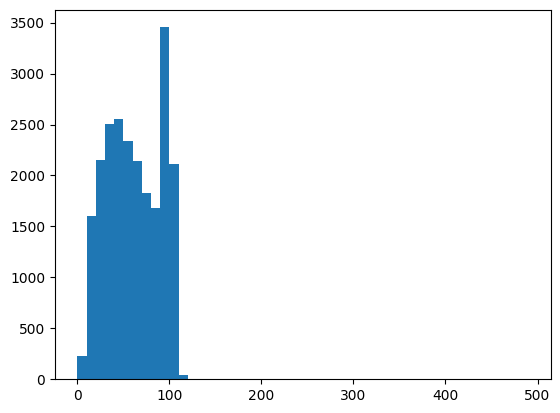

In [5]:
import matplotlib.pyplot as plt

word_per_comments = [len(comment) for comment in X_train_tokened]
plt.hist(word_per_comments, bins=np.arange(0,500,10)) # 直方图
plt.show()

In [6]:
tmp = np.array(word_per_comments)
tmp.max() # 最长的评论是116个单词

116

In [7]:
from keras.preprocessing.sequence import pad_sequences

max_words_len = 120
X_train = pad_sequences(X_train_tokened, maxlen=max_words_len)
X_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 253, 532,
       917,   3,  68], dtype=int32)

In [8]:
# 词嵌入
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import Dense
from keras.layers import SimpleRNN # 简单循环神经网络

embedding_vector_lenth = 60 # 词嵌入向量的长度为60
rnn = Sequential()
rnn.add(Embedding(dictionary_size, embedding_vector_lenth)) # no input_lenth, why?
rnn.add(SimpleRNN(100))
rnn.add(Dense(10, activation='relu')) # 全连接层
rnn.add(Dense(6, activation='softmax')) # 分类输出层
rnn.compile(loss='sparse_categorical_crossentropy',
           optimizer='adam',
           metrics=['acc'])
print(rnn.summary())


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [9]:
history = rnn.fit(X_train, y_train, validation_split = 0.3, epochs=10, batch_size=64)

Epoch 1/10
248/248 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step - acc: 0.4456 - loss: 1.3561 - val_acc: 0.5559 - val_loss: 1.1204
Epoch 2/10
248/248 ━━━━━━━━━━━━━━━━━━━━ 12s 46ms/step - acc: 0.5845 - loss: 1.0214 - val_acc: 0.5665 - val_loss: 1.0507
Epoch 3/10
248/248 ━━━━━━━━━━━━━━━━━━━━ 21s 47ms/step - acc: 0.6486 - loss: 0.8679 - val_acc: 0.5816 - val_loss: 1.0606
Epoch 4/10
248/248 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - acc: 0.7463 - loss: 0.6384 - val_acc: 0.5423 - val_loss: 1.1988
Epoch 5/10
248/248 ━━━━━━━━━━━━━━━━━━━━ 12s 47ms/step - acc: 0.8146 - loss: 0.4657 - val_acc: 0.5516 - val_loss: 1.4247
Epoch 6/10
248/248 ━━━━━━━━━━━━━━━━━━━━ 21s 48ms/step - acc: 0.8755 - loss: 0.3389 - val_acc: 0.5320 - val_loss: 1.6401
Epoch 7/10
248/248 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - acc: 0.9281 - loss: 0.2204 - val_acc: 0.4940 - val_loss: 2.0739
Epoch 8/10
248/248 ━━━━━━━━━━━━━━━━━━━━ 20s 47ms/step - acc: 0.9494 - loss: 0.1599 - val_acc: 0.5189 - val_loss: 2.2077
Epoch 9/10
248/248 ━━━━━━━━━━━━━━━━━━━━ 

In [10]:
# 词嵌入
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import Dense
from keras.layers import LSTM # 更高级的LSTM循环神经网络

embedding_vector_lenth = 60 # 词嵌入向量的长度为60
rnn_lstm = Sequential()
rnn_lstm.add(Embedding(dictionary_size, embedding_vector_lenth)) # no input_lenth, why?
rnn_lstm.add(LSTM(100))
rnn_lstm.add(Dense(10, activation='relu')) # 全连接层
rnn_lstm.add(Dense(6, activation='softmax')) # 分类输出层
rnn_lstm.compile(loss='sparse_categorical_crossentropy',
           optimizer='adam',
           metrics=['acc'])
print(rnn_lstm.summary())


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [11]:
history = rnn_lstm.fit(X_train, y_train, validation_split = 0.3, epochs=10, batch_size=64)

Epoch 1/10
248/248 ━━━━━━━━━━━━━━━━━━━━ 40s 152ms/step - acc: 0.5581 - loss: 1.2898 - val_acc: 0.6086 - val_loss: 0.9567
Epoch 2/10
248/248 ━━━━━━━━━━━━━━━━━━━━ 38s 154ms/step - acc: 0.6434 - loss: 0.8588 - val_acc: 0.6122 - val_loss: 0.9430
Epoch 3/10
248/248 ━━━━━━━━━━━━━━━━━━━━ 41s 155ms/step - acc: 0.6754 - loss: 0.7871 - val_acc: 0.6159 - val_loss: 0.9219
Epoch 4/10
248/248 ━━━━━━━━━━━━━━━━━━━━ 38s 154ms/step - acc: 0.7068 - loss: 0.7140 - val_acc: 0.6148 - val_loss: 0.9363
Epoch 5/10
248/248 ━━━━━━━━━━━━━━━━━━━━ 38s 155ms/step - acc: 0.7329 - loss: 0.6508 - val_acc: 0.6071 - val_loss: 0.9652
Epoch 6/10
248/248 ━━━━━━━━━━━━━━━━━━━━ 38s 155ms/step - acc: 0.7623 - loss: 0.5841 - val_acc: 0.6140 - val_loss: 1.0031
Epoch 7/10
248/248 ━━━━━━━━━━━━━━━━━━━━ 41s 155ms/step - acc: 0.7942 - loss: 0.5228 - val_acc: 0.6064 - val_loss: 1.0473
Epoch 8/10
248/248 ━━━━━━━━━━━━━━━━━━━━ 39s 155ms/step - acc: 0.8119 - loss: 0.4803 - val_acc: 0.6103 - val_loss: 1.1902
Epoch 9/10
248/248 ━━━━━━━━━━━━━